In [ ]:
!pip install mljar-supervised

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from supervised.automl import AutoML
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(69)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/Kcal'
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')
ans = f'{path}/sample_submission.csv'

In [ ]:
#Gender F:0, M:1
#Weight_Status Normal Weight:0, Obese:1, Overweight:2
#Height(cm) Height(Feet)*30.48 + Height(inches)*2.54

In [ ]:
train['Height(cm)'] = (train['Height(Feet)']*30.48)+(train['Height(Remainder_Inches)']*2.54)
test['Height(cm)'] = (test['Height(Feet)']*30.48)+(test['Height(Remainder_Inches)']*2.54)

In [ ]:
train['Gender'] = train['Gender'].replace({'F': 0, 'M': 1})
test['Gender'] = test['Gender'].replace({'F': 0, 'M': 1})
train['Weight_Status'] = train['Weight_Status'].replace({'Normal Weight': 0, 'Obese': 1, 'Overweight':2})
test['Weight_Status'] = test['Weight_Status'].replace({'Normal Weight': 0, 'Obese': 1, 'Overweight':2})

In [ ]:
#(F − 32) × 5/9 = C
train['Body_Temperature(C)'] = round(((train['Body_Temperature(F)'] - 32)*5/9),2)
test['Body_Temperature(C)'] = round(((test['Body_Temperature(F)'] - 32)*5/9),2)
#IB -> kg
# train['Weight(kg)'] = round((train['Weight(lb)'] /2.205),1)
# test['Weight(kg)'] = round((test['Weight(lb)'] /2.205),1)
#calc BMI
# train['BMI'] = round(train['Weight(kg)']/((train['Height(cm)']/100)**2),2)
# test['BMI'] = round(test['Weight(kg)']/((test['Height(cm)']/100)**2),2)

In [ ]:
# age_groups = ["Young" , "Middle-Aged" , "Old"]
# train["Age_Groups"] = pd.cut(train["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
# test["Age_Groups"] = pd.cut(test["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
# Young	[20 , 40)
# Middle-Aged	[40 , 60)
# Old	[60 , 80)

In [ ]:
#'Young': 0, 'Middle-Aged': 1, 'Old':2
# train['Age_Groups'] = train['Age_Groups'].replace({'Young': 0, 'Middle-Aged': 1, 'Old':2})
# test['Age_Groups'] = test['Age_Groups'].replace({'Young': 0, 'Middle-Aged': 1, 'Old':2})

In [ ]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned,Height(cm),Body_Temperature(C),Weight(kg),BMI
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,0.724400,0.497467,42.636000,89.373467,174.506128,40.018657,75.006133,24.343781
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,0.947012,0.500027,16.883188,62.817086,14.318365,0.784911,15.108779,1.573134
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,0.000000,0.000000,20.000000,1.000000,121.920000,37.110000,36.000000,19.530000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,0.000000,0.000000,28.000000,35.000000,165.100000,39.610000,63.000000,23.150000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,0.000000,0.000000,39.000000,77.000000,175.260000,40.220000,74.000000,24.360000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,2.000000,1.000000,56.000000,138.000000,185.420000,40.610000,87.000000,25.480000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,2.000000,1.000000,79.000000,300.000000,218.440000,41.500000,132.000000,29.420000


In [ ]:
train.corr()

<ipython-input-16-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned,Height(cm),Body_Temperature(C),Weight(kg),BMI
Exercise_Duration,1.000000,0.904314,0.853489,-0.004566,0.003649,0.002236,0.015100,0.007789,0.017734,0.954783,-0.003146,0.904355,0.002230,0.015098
Body_Temperature(F),0.904314,1.000000,0.770707,0.004248,-0.003311,0.007554,0.014760,0.012012,0.016474,0.824379,0.002979,0.999998,0.007553,0.017344
BPM,0.853489,0.770707,1.000000,0.003110,0.004244,0.012562,0.024155,0.016898,0.014702,0.899900,0.006319,0.770752,0.012552,0.022593
Height(Feet),-0.004566,0.004248,0.003110,1.000000,-0.536675,0.821749,0.346874,0.593454,0.015356,0.020780,0.852031,0.004247,0.821743,0.411039
Height(Remainder_Inches),0.003649,-0.003311,0.004244,-0.536675,1.000000,-0.025702,-0.001237,0.001421,-0.011303,-0.004381,-0.015548,-0.003308,-0.025681,-0.018612
Weight(lb),0.002236,0.007554,0.012562,0.821749,-0.025702,1.000000,0.590717,0.779709,0.090536,0.042568,0.957816,0.007548,1.000000,0.699807
Weight_Status,0.015100,0.014760,0.024155,0.346874,-0.001237,0.590717,1.000000,0.584415,0.184753,0.066007,0.410274,0.014742,0.590703,0.796836
Gender,0.007789,0.012012,0.016898,0.593454,0.001421,0.779709,0.584415,1.000000,0.006035,0.027619,0.704117,0.012028,0.779673,0.665697
Age,0.017734,0.016474,0.014702,0.015356,-0.011303,0.090536,0.184753,0.006035,1.000000,0.159624,0.011184,0.016454,0.090541,0.250477
Calories_Burned,0.954783,0.824379,0.899900,0.020780,-0.004381,0.042568,0.066007,0.027619,0.159624,1.000000,0.021906,0.824418,0.042560,0.066503


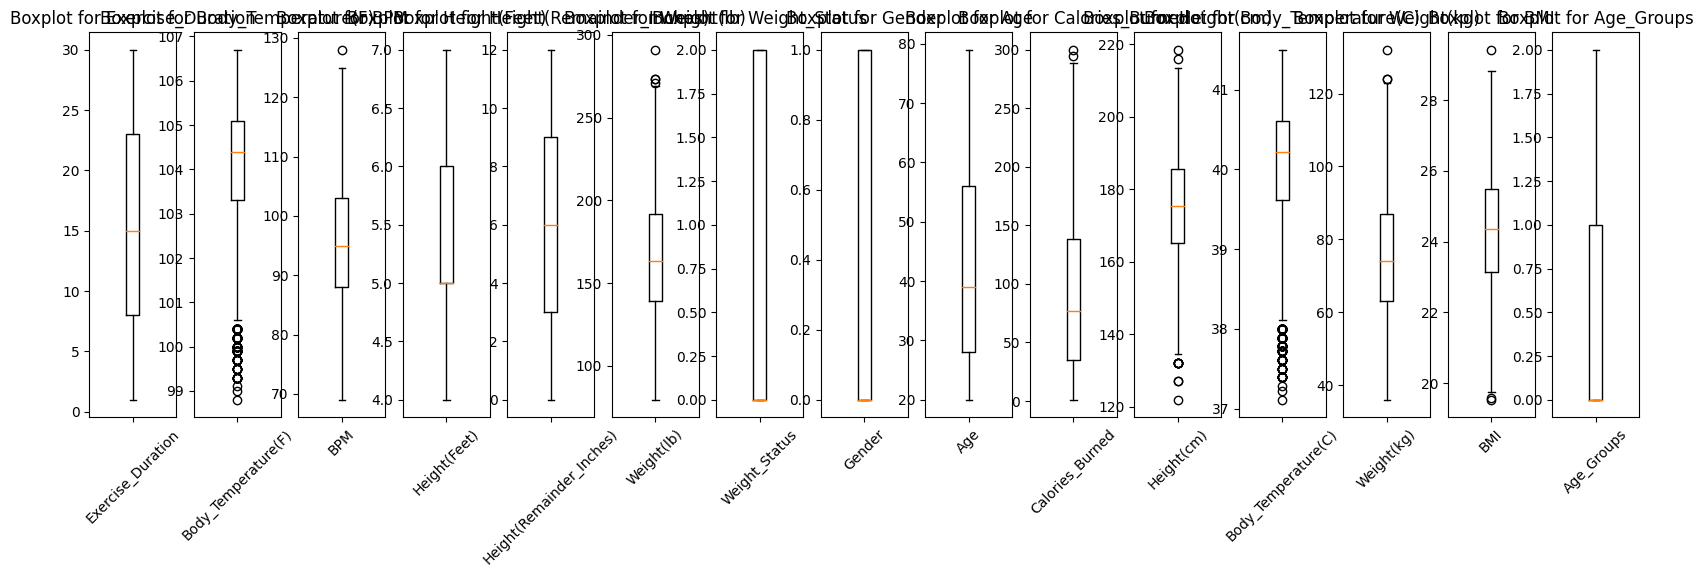

In [ ]:
d_train = train.drop(['ID'], axis=1)
# Boxplot 그리기
fig, axs = plt.subplots(ncols=len(d_train.columns), figsize=(20, 5))

for i, column in enumerate(d_train.columns):
    axs[i].boxplot(d_train[column])
    axs[i].set_title(f'Boxplot for {column}')
    axs[i].set_xticklabels([column], rotation=45)

plt.show()

<ipython-input-20-1d5fa720aac8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


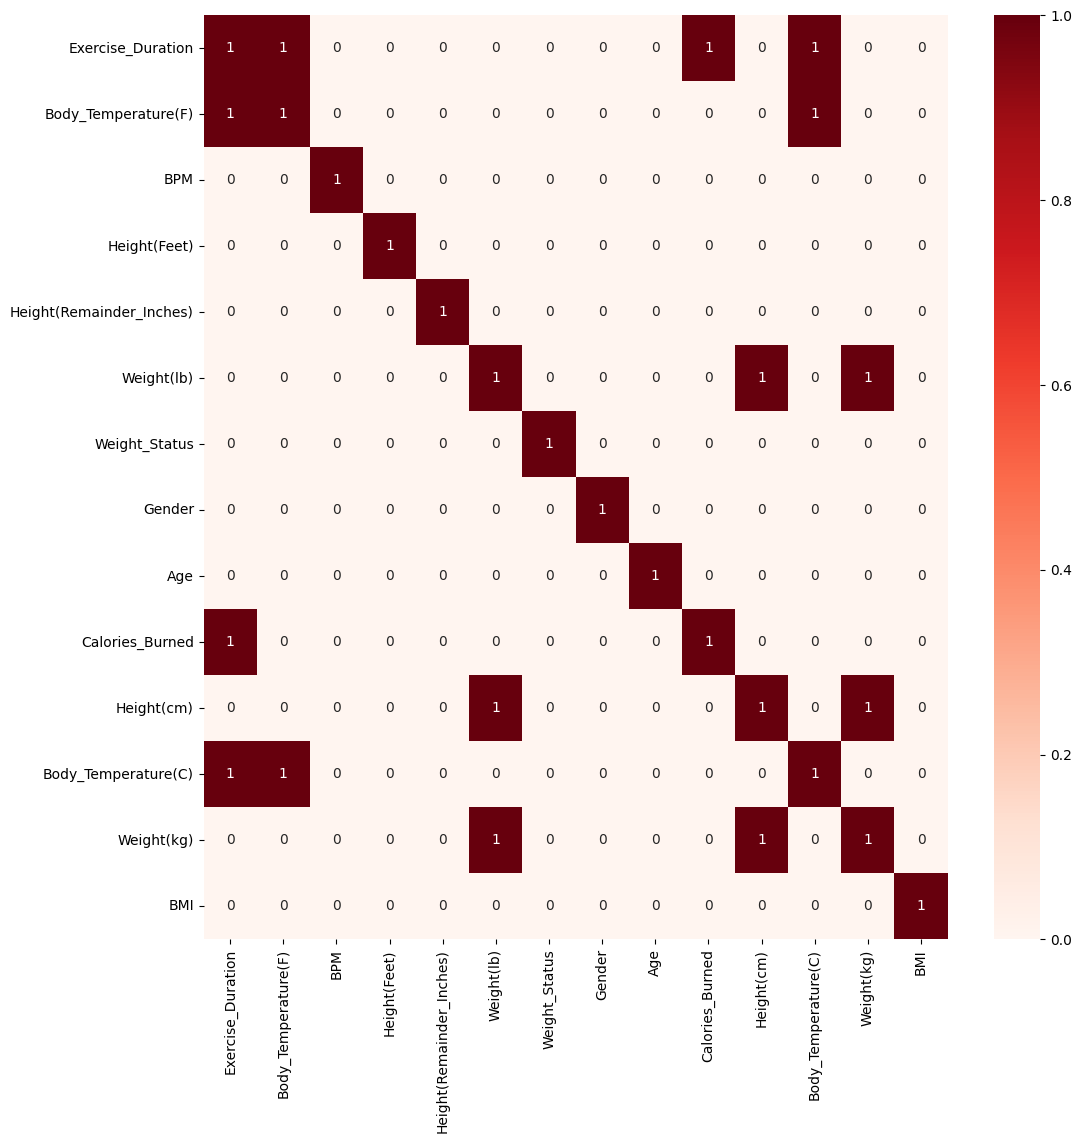

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr()>0.9, annot = True, cmap = 'Reds')
plt.show()

In [ ]:
#Calories_Burned 와 Exercise_Duration가 상관관계가 가장 높음
#####이상치
#Body_Temperature, Weight,Height, Calories_Burned
##### 히트맵
#BPM, Body_Temperature, Exercise_Duration

In [ ]:
#x_train = train.drop(['ID','Calories_Burned', 'Height(Feet)', 'Height(Remainder_Inches)', 'Body_Temperature(F)','Weight(lb)','Weight(kg)', 'Height(cm)'],axis=1)
x_train = train.drop(['ID','Calories_Burned', 'Height(Feet)', 'Height(Remainder_Inches)', 'Body_Temperature(F)','Weight(lb)'],axis=1)
#train_x = train.drop(['ID', 'Height(Feet)', 'Height(Remainder_Inches)', 'Body_Temperature(F)', 'Weight(lb)'],axis=1)
#t = train.drop('ID', axis=1)
x_test = test.drop(['ID','Height(Feet)', 'Height(Remainder_Inches)','Body_Temperature(F)','Weight(lb)','Weight(kg)', 'Height(cm)'], axis=1)
y = train['Calories_Burned'].loc[:]
y_train = train['Calories_Burned']

<ipython-input-24-e93d5c510cff>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
<ipython-input-24-e93d5c510cff>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<ipython-input-24-e93d5c510cff>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com

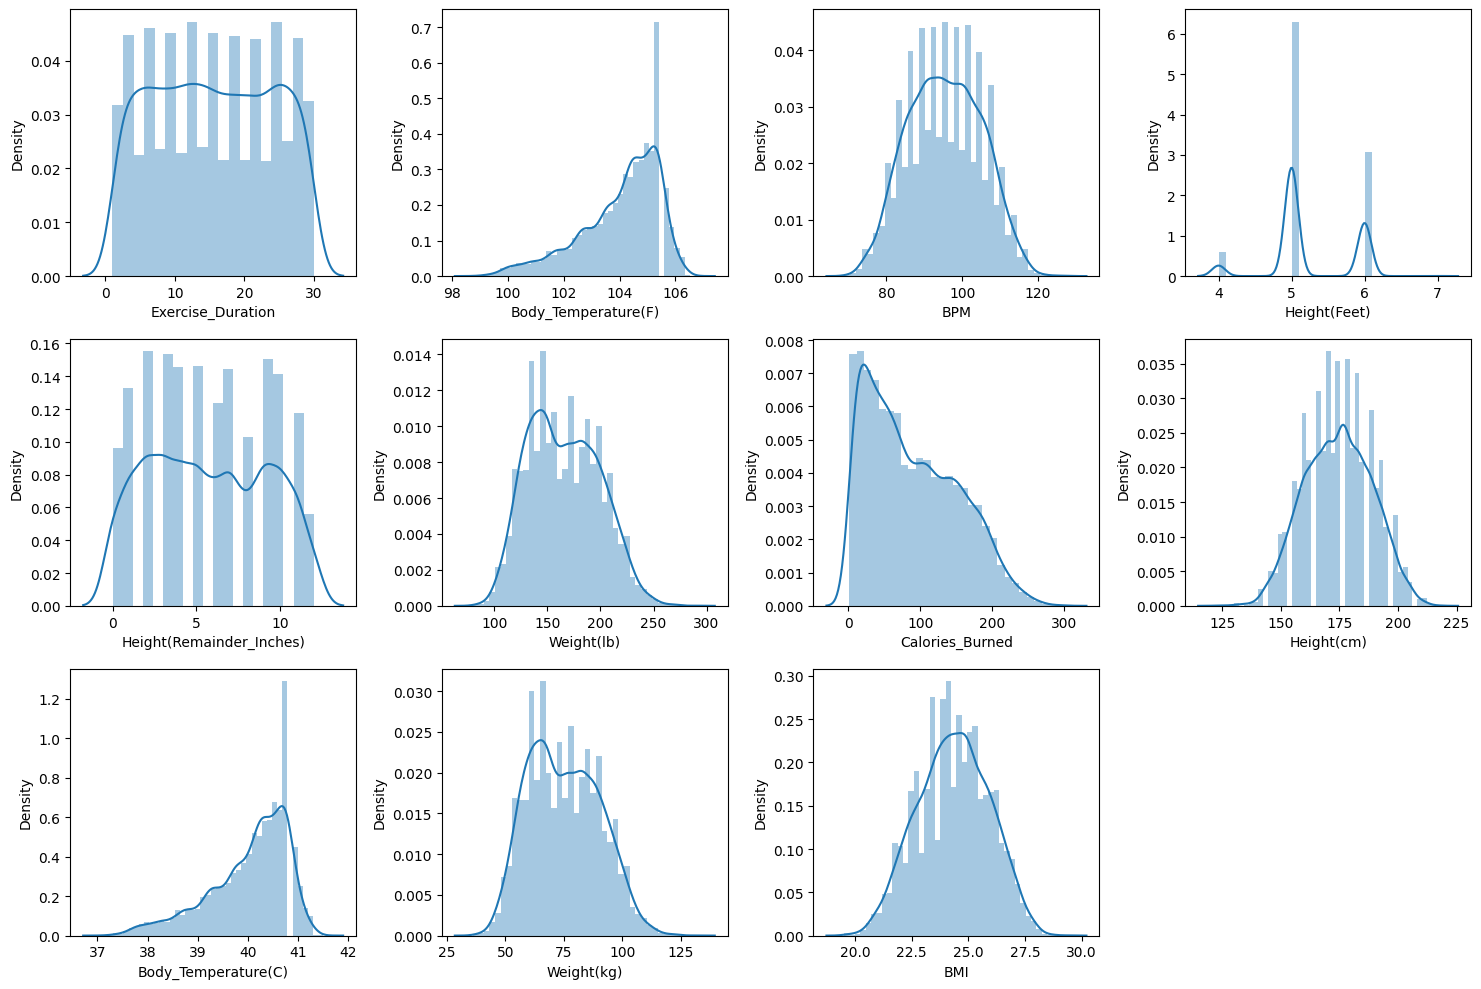

In [ ]:
features = t.select_dtypes(include='float').columns
  
plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.distplot(t[col])
plt.tight_layout()
plt.show()

In [ ]:
x_train.head()

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Body_Temperature(C),BMI,Age_Groups
0,26.0,107.0,0,0,45,40.89,22.79,1
1,7.0,88.0,2,1,50,39.61,25.99,1
2,7.0,86.0,2,1,29,39.61,27.28,0
3,17.0,99.0,0,0,33,40.00,23.84,0
4,9.0,88.0,0,1,38,39.28,24.36,0


In [ ]:
x_test.head()

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Body_Temperature(C),BMI,Age_Groups
0,26.0,107.0,0,0,45,40.61,21.66,1
1,29.0,111.0,2,1,21,40.50,25.47,0
2,11.0,90.0,0,1,58,40.00,25.07,1
3,24.0,108.0,2,1,35,40.78,26.61,0
4,29.0,116.0,0,0,67,41.11,23.13,2


### Normalize

In [ ]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(x_train)
#x_train_scaled = scaler.fit_transform(train_x)

test_scaled = scaler.transform(x_test)

In [ ]:

# standarded = StandardScaler()
# train_standarded = standarded.fit_transform(x_train)
# test_standarded = standarded.fit_transform(x_test)

# train_ss = standarded.fit_transform(train_scaled)
# test_ss = standarded.fit_transform(test_scaled)

### 이상치

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):

  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [ ]:
# outlier_idx = get_outlier(df=train, column='Body_Temperature(F)', weight=1.5)
# train.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=train, column='Weight(lb)', weight=1.5)
# train.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=train, column='Height(cm)', weight=1.5)
# train.drop(outlier_idx, axis=0, inplace=True)

### AutoML

In [ ]:
automl = AutoML(mode='Compete', eval_metric='rmse')

In [ ]:
# #automl.fit(x_train, y_train) 
automl.fit(train_scaled, y_train)

AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree rmse 18.473263 trained in 0.62 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree rmse 17.550584 trained in 3.78 seconds
2_DecisionTree rmse 15.165529 trained in 2.89 seconds
3_DecisionTree rmse 15.165529 trained in 2.89 seconds
4_Lin

In [ ]:
x_test.head()

In [ ]:
pred = automl.predict(test_scaled)
#pred = automl.predict(x_test)


In [ ]:

sample = pd.read_csv(f'{path}/sample_submission.csv')
sample['Calories_Burned'] = pred
sample.to_csv('automl_scaled.csv',index=False)

In [ ]:
from google.colab import files
files.download('/content/automl_scaled.csv')